In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
house = pd.read_csv("C:\\Users\\shama\\Documents\\excelr_project\\Property_info1.csv")
house

,title,location,bhk,bath,total_sqft,price_per_sqft,price,area_type
0,2 BHK Apartment,Maruthi Nagar,2,2,959,4171,42.00,Built-upArea
1,3 BHK Apartment,3rd Phase JP Nagar,3,3,2280,9868,225.00,Built-upArea
2,11 Bedroom House,8th Phase JP Nagar,11,11,1200,15000,180.00,PlotArea
3,3 BHK Apartment,CV Raman Nagar,3,3,2189,10507,230.00,CarpetArea
4,2 BHK Apartment,CV Raman Nagar,2,2,1165,5579,65.00,CarpetArea
...,...,...,...,...,...,...,...,...
1637,3 BHK Apartment,Nehru Nagar,3,2,1275,5800,73.95,Superbuilt-up
1638,2 BHK Apartment,Sarjapur Road,2,2,1049,5243,55.00,CarpetArea
1639,2 BHK Apartment,Addischetan Layout,2,2,1000,5800,58.00,CarpetArea
1640,2 Bedroom House,Kengeri,2,1,650,8923,58.00,Built-upArea


In [5]:
house.dtypes

title              object
location           object
bhk                 int64
bath                int64
total_sqft          int64
price_per_sqft      int64
price             float64
area_type          object
dtype: object

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1642 non-null   object 
 1   location        1642 non-null   object 
 2   bhk             1642 non-null   int64  
 3   bath            1642 non-null   int64  
 4   total_sqft      1642 non-null   int64  
 5   price_per_sqft  1642 non-null   int64  
 6   price           1642 non-null   float64
 7   area_type       1642 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 102.8+ KB


In [7]:
# The function 'values' returns the details of rows containing maximum and minimum values of a particular column.

def values(x):
    max_=house[x].idxmax()
    max_details=pd.DataFrame(house.loc[max_])
    
    min_=house[x].idxmin()
    min_details=pd.DataFrame(house.loc[min_])
    
    both=pd.concat([max_details,min_details],axis=1)
    
    return both

# Univariate Analysis

# 1st Interval [10.5 to 100L]

In [8]:
d=house[(house['price']>=10.5)&(house['price']<=100.00)]
d.shape

(1045, 8)

# Title

In [9]:
# Returns count of title's in dataset.

d1=d['title'].value_counts()
d1

2 BHK Apartment                     567
3 BHK Apartment                     233
1 BHK Apartment                      40
1 Bedroom House                      38
2 BHK Independent Builder Floor      38
2 Bedroom House                      34
3 Bedroom House                      24
4 Bedroom House                      16
3 BHK Independent Builder Floor      15
1 BHK Independent Builder Floor      13
5 Bedroom House                       8
6 Bedroom House                       5
7 Bedroom House                       3
Studio Apartments / 1 RK Flats        3
4 BHK Apartment                       3
11 Bedroom House                      1
12 Bedroom House                      1
6 BHK Independent Builder Floor       1
4 BHK Independent Builder Floor       1
8 BHK Independent Builder Floor       1
Name: title, dtype: int64

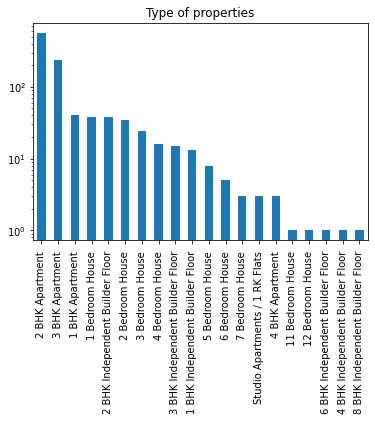

In [10]:
d1.plot.bar(); # Plotting bar graph
plt.yscale('log') 
# we use log function so that least values can also be clearly visible.
#(when log is not used values such as 3,2,1,1 are barely visible in graph)
plt.title("Type of properties");

There are maximum number of 2BHK Apartments in the range 10.5L to 100L

# Location

In [11]:
# Returns count of location's in dataset.

d2=d['location'].value_counts()
d2

 Electronic City             29
 Electronics City Phase 1    28
 Yelahanka                   26
 Whitefield                  25
 Sarjapur Road               21
                             ..
 Venkatadri Layout            1
 Yelahanka,isro layout        1
 Garvebhavi Palya             1
 Dodda Bomma Sandra           1
 Addischetan Layout           1
Name: location, Length: 442, dtype: int64

<AxesSubplot:>

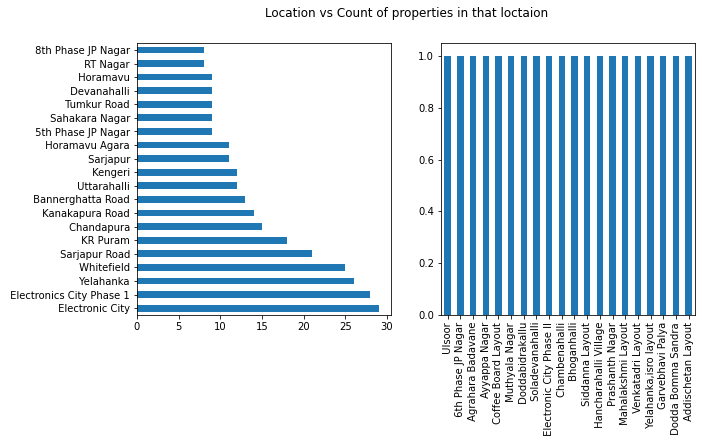

In [12]:
f,ax=plt.subplots(1,2,figsize=(10,5)) # Defining plot size and subplots.
f.suptitle("Location vs Count of properties in that loctaion") # Title for the plot.
d2.head(20).plot(kind='barh',ax=ax[0]) # Plot for top 20 values.

d2.tail(20).plot(kind='bar',ax=ax[1]) # Plot for least 20 values.

In [13]:
#returns total number for locations whose count is 1.

len((d['location'].value_counts())==1)

442

Highest number of properties in the considered price interval comes from Electronic City and next Electronics city Phase1 follows.
There 442 locations which has only one property.

# Price (Lakhs)

<AxesSubplot:xlabel='price', ylabel='Density'>

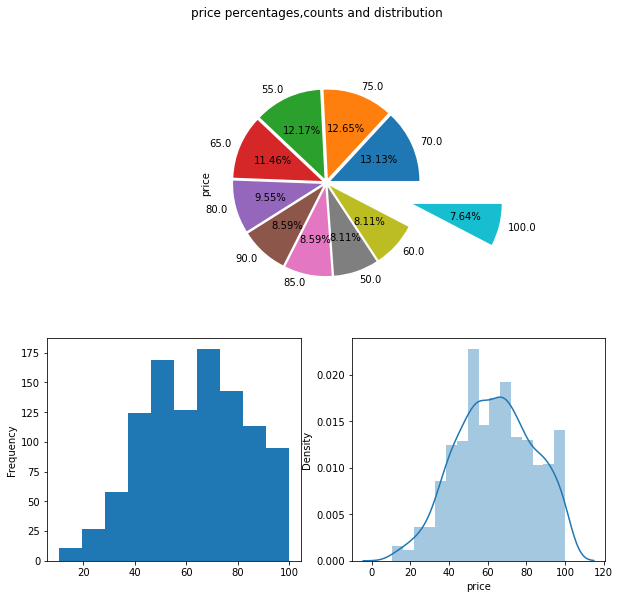

In [14]:
f,ax=plt.subplots(figsize=(10,9)) # Plot size
ax1=plt.subplot(211) 
f.suptitle("price percentages,counts and distribution") # Plot title
explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,1) # Distance between each sub-pie.
d['price'].value_counts(ascending=False).head(10).plot(kind='pie',autopct="%0.2f%%",explode=explode,ax=ax1)
# Pie plot for top 10 values of price.

ax2=plt.subplot(223)
d['price'].plot.hist() # Histogram for all prices.
ax2.plot

ax3=plt.subplot(224)
sns.distplot(d['price'],ax=ax3) # Distribution plot for all prices.

Approximately 13.13% of properties in the price range 10.5L to 80 L have price as 70 L.
12.65% of properties have price as 75 L.
7.64% of properties have price as 100 L.

# Price_per_sqft & Total_Area_sqft

<AxesSubplot:ylabel='Frequency'>

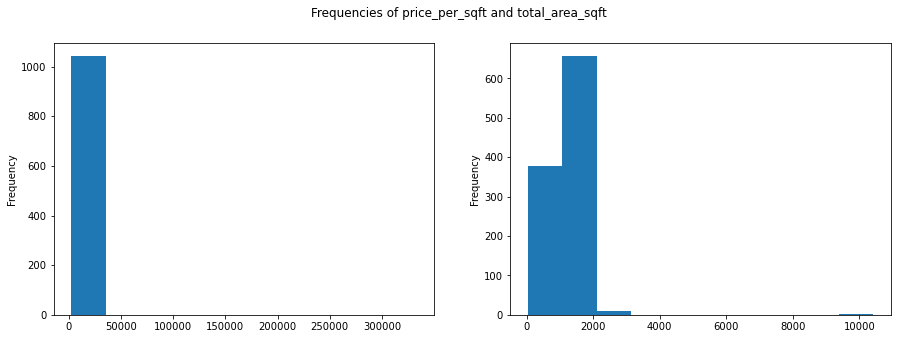

In [15]:
f,ax=plt.subplots(1,2,figsize=(15,5))
f.suptitle("Frequencies of price_per_sqft and total_area_sqft") # Plot title
d['price_per_sqft'].plot(kind='hist',ax=ax[0]) # Histogram for price_per_sqft.

d['total_sqft'].plot(kind='hist',ax=ax[1]) # Histogram for total_area_sqft.

Properties in 10.5L to 80L range have price_per_sqft price between 100 to 1000.

# Area_Type

In [16]:
# Returns count of area_type of properties in dataset.

d['area_type'].value_counts()

Superbuilt-up    429
Built-upArea     292
CarpetArea       241
PlotArea          83
Name: area_type, dtype: int64

Text(0.5, 1.0, 'status of property')

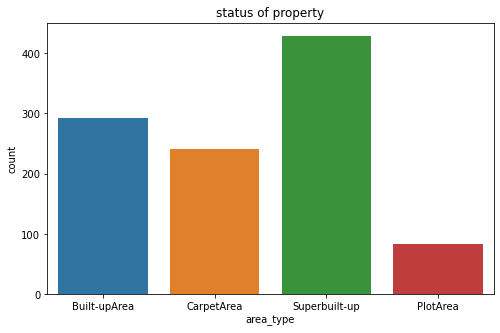

In [17]:
fig,ax=plt.subplots(figsize=(8,5))
sns.countplot(d['area_type'],ax=ax) # Count plot
plt.title("status of property") # Plot title

As compared to others Superbuilt-up are more in 10.5 to 100 L price range.

Built-up Area to be lowest less than 50 and Superbuilt-up to be around 280.

# 2nd Interval [100 to 800L]

In [18]:
b=house[(house['price']>=100)&(house['price']<=900.00)]
b.shape

(629, 8)

In [19]:
# Here we define function for plotting title.
# we just need to pass the dataset we want to plot.

def title(x):
    x.plot.bar() # x is the dataframe.
    plt.yscale('log')
    plt.title("Type of properties")

In [20]:
# Function for plotting locations.

def location(x):
    f,ax=plt.subplots(1,2,figsize=(10,5))
    f.suptitle("Location vs Count of properties in that loctaion")
    x.head(20).plot(kind='barh',ax=ax[0])  # x is the dataframe.

    x.tail(20).plot(kind='bar',ax=ax[1]) # x is the dataframe. 

In [21]:
#function for plotting prices.

def price(x):
    f,ax=plt.subplots(figsize=(10,9))
    ax1=plt.subplot(211)
    f.suptitle("price percentages,counts and distribution")
    explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,1)
    x['price'].value_counts(ascending=False).head(10).plot(kind='pie',autopct="%0.2f%%",explode=explode,ax=ax1)
    # x is the dataframe.
    
    ax2=plt.subplot(223)
    x['price'].plot.hist()  # x is the dataframe.
    ax2.plot

    ax3=plt.subplot(224)
    sns.distplot(x['price'],ax=ax3)  # x is the dataframe.

In [22]:
# Function for plotting total_sqft and price_per_sqft.

def area_rate(x):
    f,ax=plt.subplots(1,2,figsize=(15,5))
    f.suptitle("Frequencies of rate_persqft and area_insqft")
    x['price_per_sqft'].plot(kind='hist',ax=ax[0])  # x is the dataframe.

    x['total_sqft'].plot(kind='hist',ax=ax[1])   # x is the dataframe.

In [23]:
# Function for plotting building status

def b_status(x):
    fig,ax=plt.subplots(figsize=(8,5))
    sns.countplot(x['area_type'],ax=ax)  # x is the dataframe.
    plt.title("Area type of property")
    #plt.yscale('log')

# Title

In [24]:
b1=b['title'].value_counts()
b1

3 BHK Apartment                      167
4 Bedroom House                       68
3 Bedroom House                       67
2 BHK Apartment                       47
5 Bedroom House                       47
1 Bedroom House                       47
2 Bedroom House                       24
6 Bedroom House                       21
3 BHK Independent Builder Floor       18
4 BHK Apartment                       18
7 Bedroom House                       15
1 BHK Independent Builder Floor       11
2 BHK Independent Builder Floor        8
9 Bedroom House                        7
8 Bedroom House                        7
12 Bedroom House                       6
4 BHK Independent Builder Floor        6
11 Bedroom House                       6
6 BHK Independent Builder Floor        5
13 Bedroom House                       4
14 Bedroom House                       4
9 BHK Independent Builder Floor        3
10 BHK Independent Builder Floor       3
5 BHK Independent Builder Floor        3
10 Bedroom House

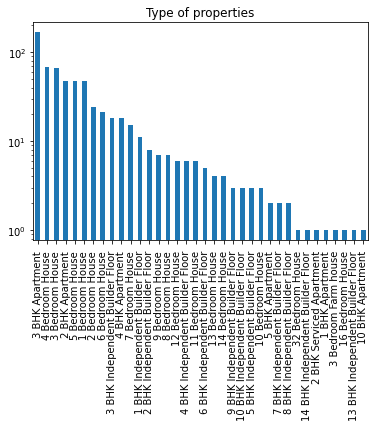

In [25]:
title(b1)

There are almost 1500 3BHK Apartment, 120 2BHK Apartment, 50 3BHK houses, 50 4BHK house.

# Location

In [26]:
b2=b['location'].value_counts()
b2

 Whitefield                             13
 Sarjapur Road                          11
 Banashankari                           10
 Yelahanka                               8
 Jakkur                                  8
                                        ..
 Rayasandra                              1
 Brookefield                             1
 Nagarbhavi                              1
 Amba Bhavani Layout, Vidyaranyapura     1
 Hulimangala                             1
Name: location, Length: 357, dtype: int64

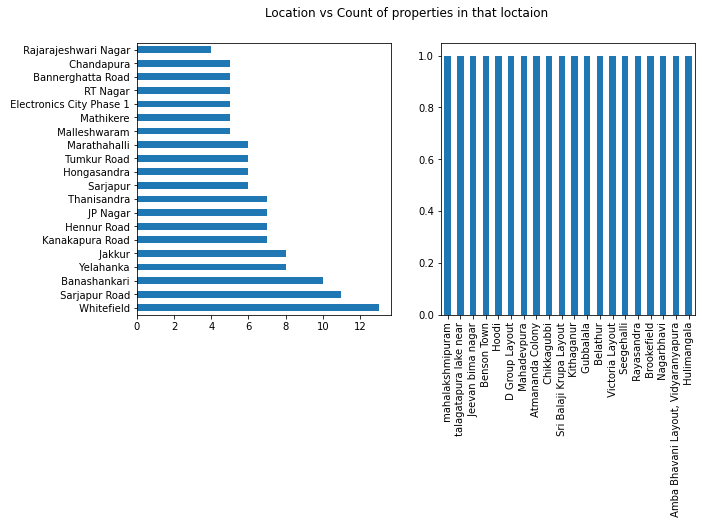

In [27]:
location(b2)

Highest number of properties in the considered price interval comes from Whitefield and followed by kanakapura road and follows.

# Price (Lakhs)

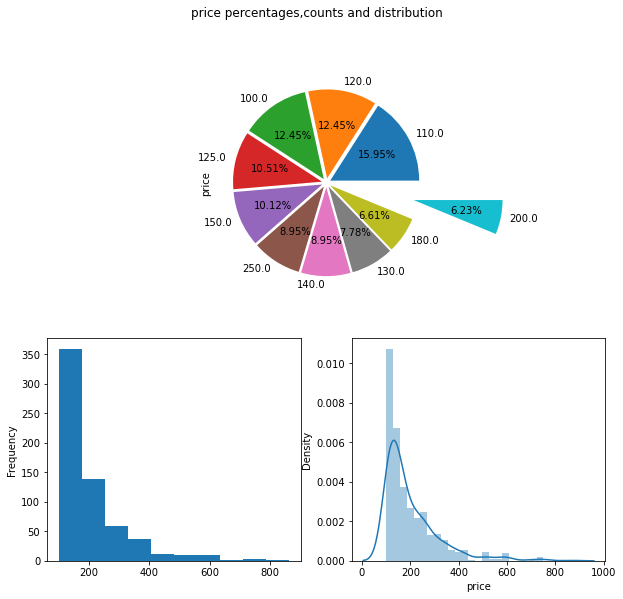

In [28]:
price(b)

Approximately 12.73% of properties in the price range 80 to 160 L have price as 110 L.

12.42% of properties have price as 80 L.

8.07% of properties have price as 150 L.


# Price_per_sqft & Total_Area_sqft

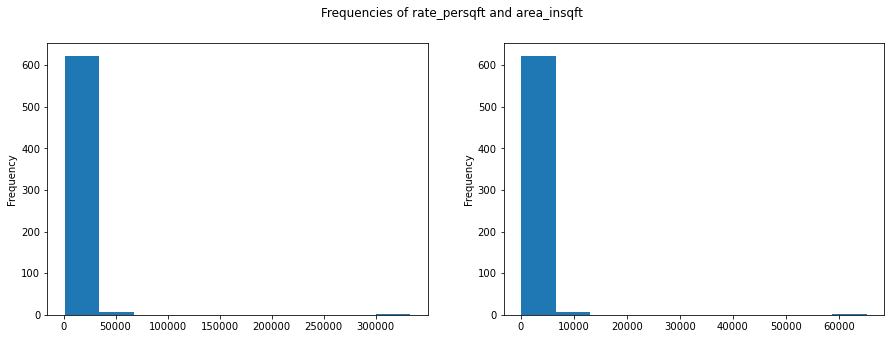

In [29]:
area_rate(b)

700 properties in 80 to 160L range have rate_persqft price between 100 to 30000.

Area of properties are mostly around 100 to 6000 i.e,almost 700 properties

# Area Type

In [52]:
b['area_type'].value_counts()

PlotArea         241
Built-upArea     156
Superbuilt-up    152
CarpetArea        80
Name: area_type, dtype: int64

In [ ]:
b_status(b)

Superbuilt-up are more in 80 to 160 L price range.
    
CarpetArea to be lowest less than 100 and Superbuilt-up to be highest.

# Bivariate Analysis

# Title vs Price(Lakhs)

In [31]:
def bivarant_swarm(col1,col2,x,y):
    c=house[(house['price']>=x)&(house['price']<=y)]
    c=c.sort_values(by='price',ascending=False)
    k=c[col1].head(30)
    l=c[col2].head(30)
    fig,ax=plt.subplots(figsize=(10,5))
    fig.suptitle(' Swarmplot between two varibles')
    sns.swarmplot(x=k,y=l,data=c,ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha='right')
    ax.set_yscale('linear')
    plt.show()
     ######High then low########
    c=c.sort_values(by='price',ascending=True)
    k=c[col1].head(30)
    l=c[col2].head(30)
    fig,ax1=plt.subplots(figsize=(10,5))
    sns.swarmplot(x=k,y=l,data=c,ax=ax1)
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=50,ha='right')
    #ax1.set_yscale('log')
    plt.show()

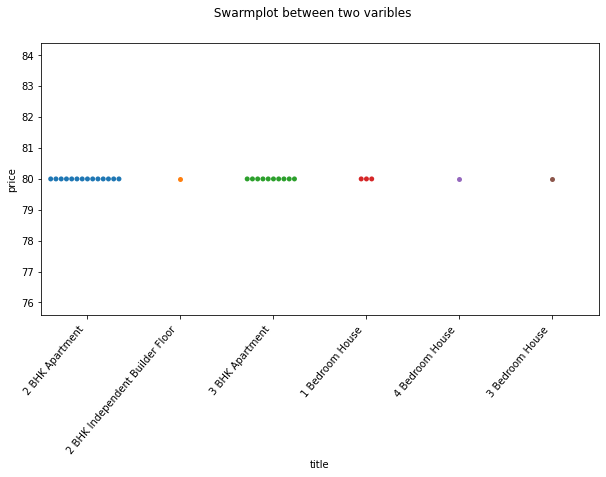

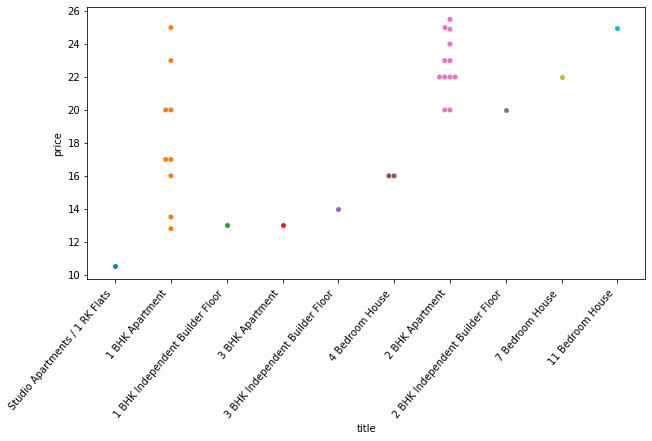

In [32]:
bivarant_swarm('title','price',10.5,80)

Graph 1 :
For the price range of 10.5L to 80L from high to low price for top 30

Mostly, highest price is for 2BHK Apartment.

Graph 2:
For the price range of 10.5L to 80L from low to high price for bottom 30

Mostly, lowest price is for 1 BHK Apartment

# Total_sqft Vs Price(Lakhs)

In [33]:
def bivarant_box(col1,col2,x,y):
    c=house[(house['price']>=x)&(house['price']<=y)]
    c=c.sort_values(by='price',ascending=False)
    k=c[col1].head(20)
    l=c[col2].head(20)
    fig,ax=plt.subplots(figsize=(10,5))
    fig.suptitle("Box plot between 2 variables")
    sns.boxplot(x=k,y=l,data=c,ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha='right')
    ######## High then Low####
    c=c.sort_values(by='price',ascending=True)
    k=c[col1].head(20)
    l=c[col2].head(20)
    fig,ax1=plt.subplots(figsize=(10,5))
    sns.boxplot(x=k,y=l,data=c,ax=ax1)
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=50,ha='right')
    plt.show()

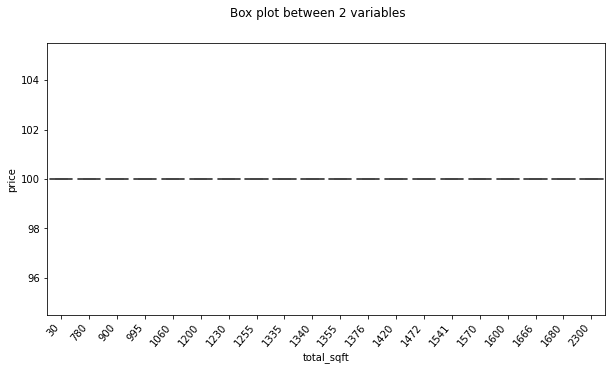

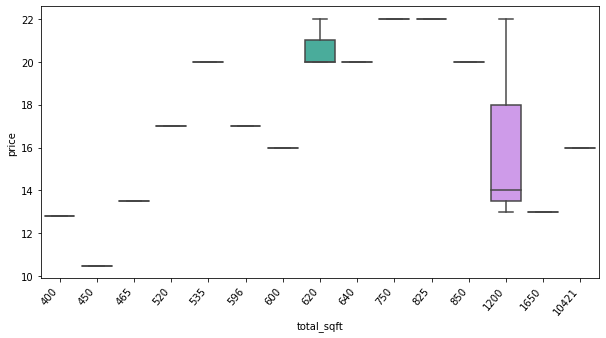

In [34]:
bivarant_box('total_sqft','price',10.5,100)

Graph 1 :
For the price range of 10.5L to 80L from high to low price for top 30

Mostly,same price for each kind of area per sqft

Graph 2:
For the price range of 10.5L to 80L from low to high price for bottom 30

Mostly,lowest price is for 450 sqfts

# Total_sqft Vs Price_per_sqft

In [35]:
def bivarant_violin(col1,col2,x,y):
    c=house[(house['price']>=x)&(house['price']<=y)]
    c=c.sort_values(by='price',ascending=False)
    k=c[col1].head(20)
    l=c[col2].head(20)
    fig,ax=plt.subplots(figsize=(10,5))
    fig.suptitle(" Violin plot between 2 variables")
    sns.violinplot(x=k,y=l,data=c,ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha='right')
    ######## High then Low####
    c=c.sort_values(by='price',ascending=True)
    k=c[col1].head(20)
    l=c[col2].head(20)
    fig,ax1=plt.subplots(figsize=(10,5))
    sns.violinplot(x=k,y=l,data=c,ax=ax1)
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=50,ha='right')
    plt.show()

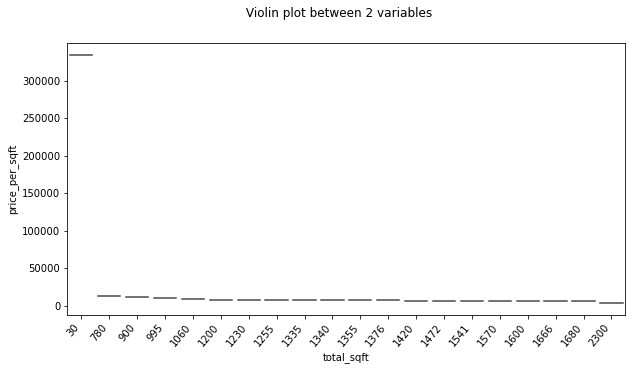

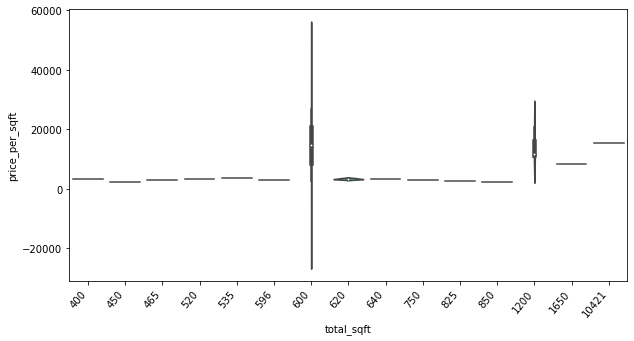

In [36]:
bivarant_violin('total_sqft','price_per_sqft',10.5,100)

Graph 1 :
For the price range of 10.5L to 80L from high to low price for top 30

Graph 2:
For the price range of 10.5L to 80L from low to high price for bottom 30

Mostly,minimum area in sqft is for 3000 rate per sqft

# Location Vs Price(Lakhs)

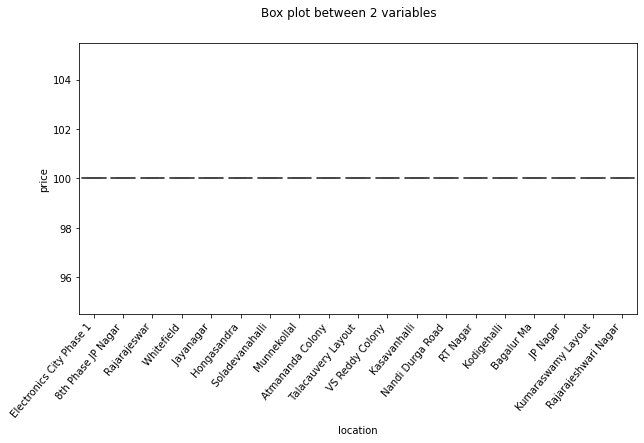

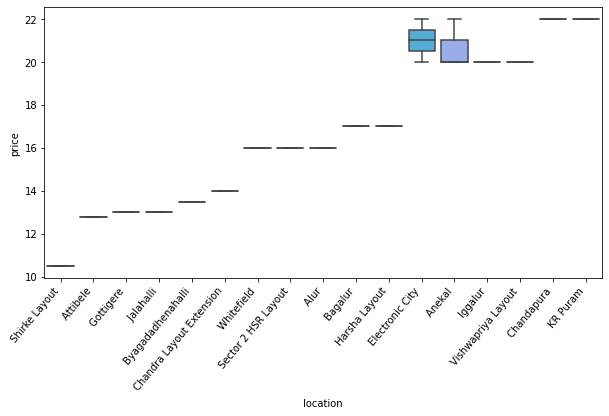

In [37]:
bivarant_box('location','price',10.5,100)

Graph 1 :
For the price range of 10.5L to 80L from high to low price for top 30

Mostly,same price for each kind of location

Graph 2:
For the price range of 10.5L to 80L from low to high price for bottom 30

Mostly,lowest price around 10L for shirke Layout.

# Interval (100-800L)

# Title Vs Price(Lakhs)

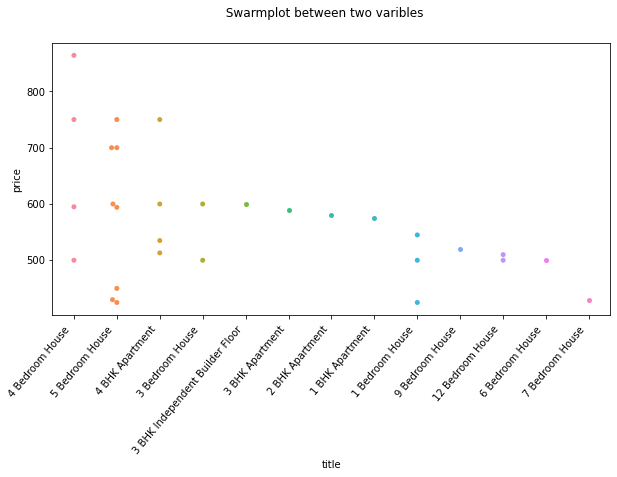

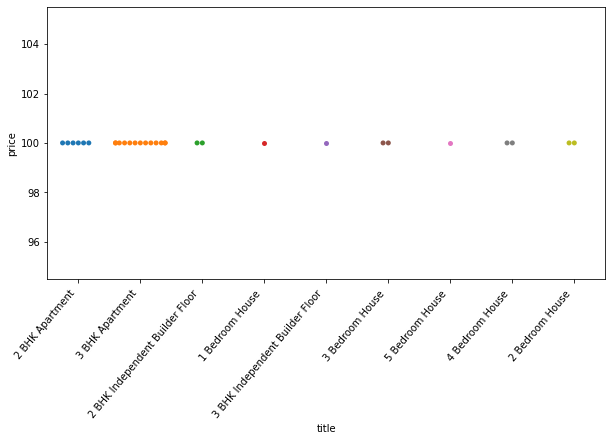

In [38]:
bivarant_swarm('title','price',100,900)

Graph 1 :
For the price range of 100L to 800L from high to low price for top 30
Mostly, highest price of more than 800L is there for 4 Bedroom house, followed by 5 Bedroom house and 4BHK Apartment

Graph 2:
For the price range of 100L to 800L from low to high price for bottom 30

In this,3BHK Apartment are more in number for the minimum price approximately.

# Total_sqft Vs Price(Lakhs)

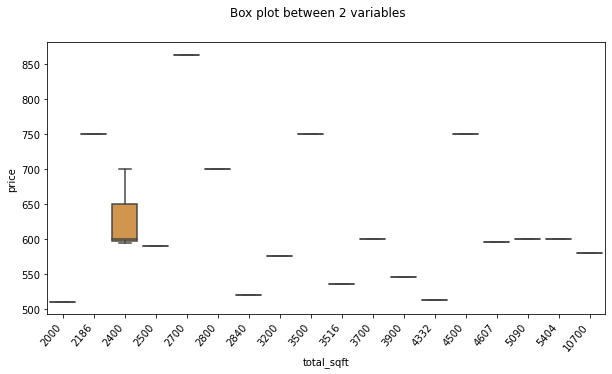

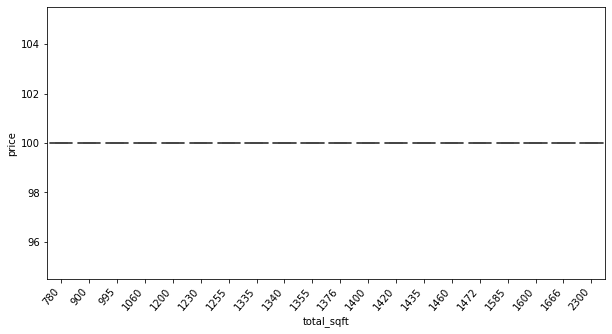

In [39]:
bivarant_box('total_sqft','price',100,900)

Graph 1 :
For the price range of 100L to 900L from high to low price for top 30

Mostly, highest price of 860L is there for 2700 sqft in this plot

Graph 2:
For the price range of 100L to 900L from low to high price for bottom 30

Mostly, lowest price of 100L is there for all areas in sqft in this plot

# Location Vs Price(Lakhs)

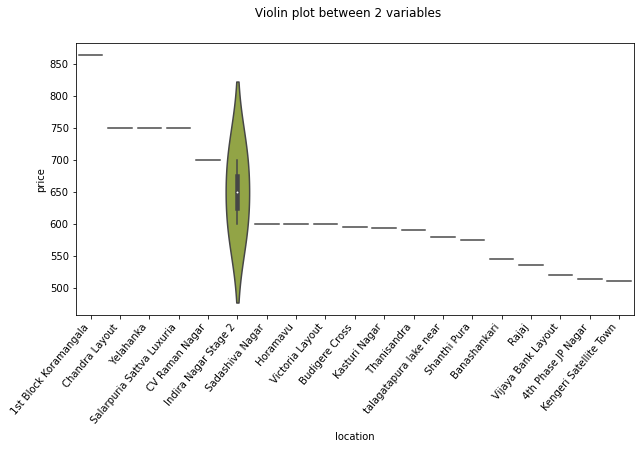

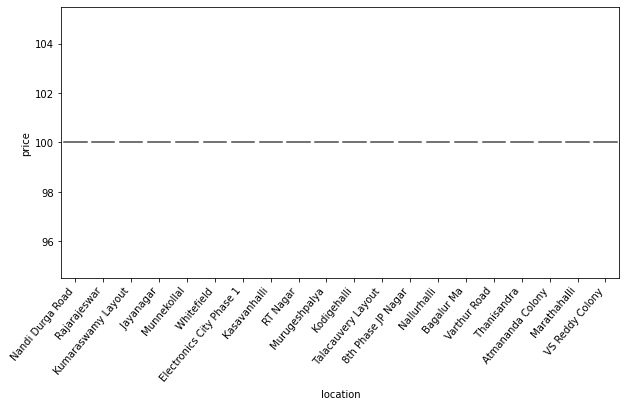

In [40]:
bivarant_violin('location','price',100,900)

Graph 1 :
For the price range of 100L to 900L from high to low price for top 30

Mostly, highest price of 860L is there in 1st Block Koramangala

Graph 2:
For the price range of 100L to 700L from low to high price for bottom 30

Mostly, lowest price of 100L is there for all kinds of properties.


# Multivariate Analysis

In [41]:
house.corr()

,bhk,bath,total_sqft,price_per_sqft,price
bhk,1.000000,0.940905,0.141893,0.160586,0.400229
bath,0.940905,1.000000,0.173792,0.164219,0.448100
total_sqft,0.141893,0.173792,1.000000,-0.022152,0.294522
price_per_sqft,0.160586,0.164219,-0.022152,1.000000,0.316379
price,0.400229,0.448100,0.294522,0.316379,1.000000


# Pairplot drawn for the dataset

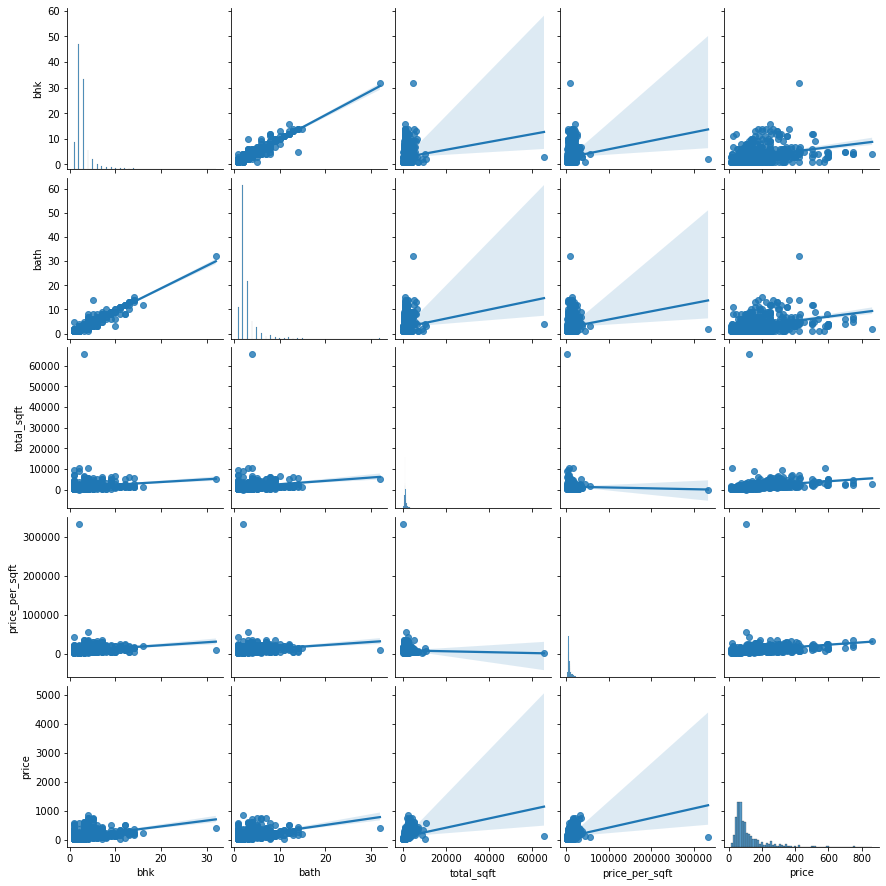

In [42]:
#It is obtained from the correlation values between the observations
sns.pairplot(house,kind='reg')

The relationship between each and every variable is plotted where the plots below the diagonal are having mirror plots above the diagonal.

Mostly,there are positive and constant slopes above and below of the diagonal.

# Interval(10.5L-100L)

In [43]:
c=house[(house['price']>=10.5)&(house['price']<=100.00)]
d6_sort=c.sort_values(by='price',axis=0,ascending=False)

In [44]:
def multi_scatter(col1,col2,col3,x,y):
    c=house[(house['price']>=x)&(house['price']<=y)]
    d6_sort=c.sort_values(by='price',axis=0,ascending=False)
    sns.set_style("whitegrid")
    ax1=sns.FacetGrid(d6_sort.head(30),hue=col3,height=5,aspect=2).map(plt.scatter,col1,col2,marker='+').add_legend()
    ax1.set_xticklabels(rotation=60)
    d6_sort=c.sort_values(by='price',axis=0,ascending=True)
    sns.set_style("whitegrid")
    ax2=sns.FacetGrid(d6_sort.head(30),hue=col3,height=5,aspect=2).map(plt.scatter,col1,col2,marker='+').add_legend()
    ax2.set_xticklabels(rotation=60)
    plt.show()

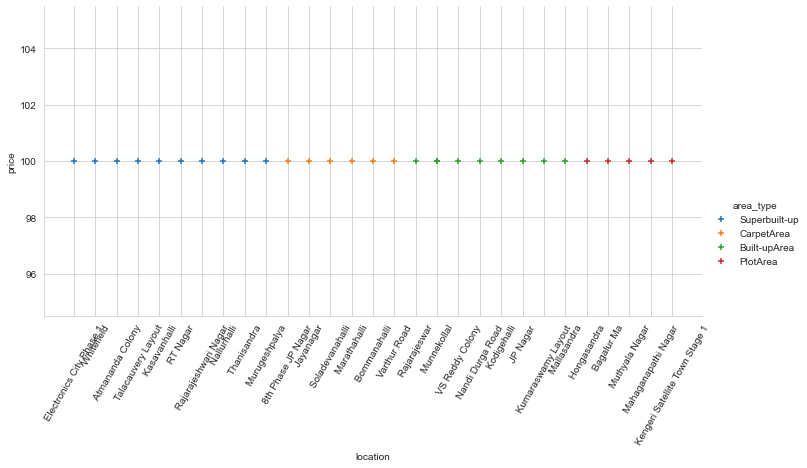

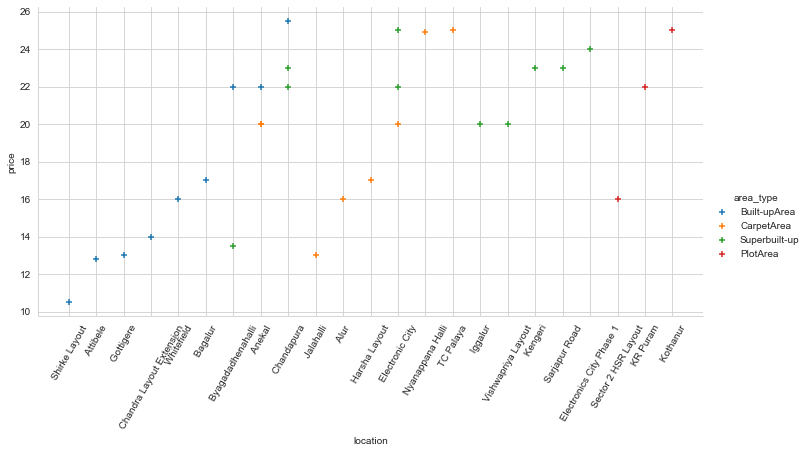

In [45]:
multi_scatter('location','price','area_type',10.5,100.00)

Graph 1:
For the price range of 10.5L to 100L from high to low price for top 30

Mostly,highest price of 10L is there in all locations but Builtup Area are more from Electronic city phase 1 to Thanisandra.

Graph 2:
For the price range of 10.5L to 100L from high to low price for bottom 30

Moslty,lowest price of around 10L is there for Built-up Area at Shirke Layout and highest price of 26L in chandrapura.

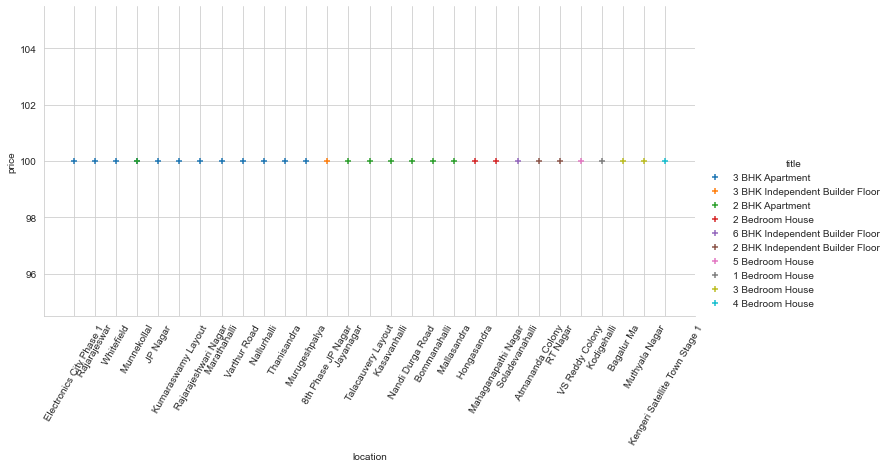

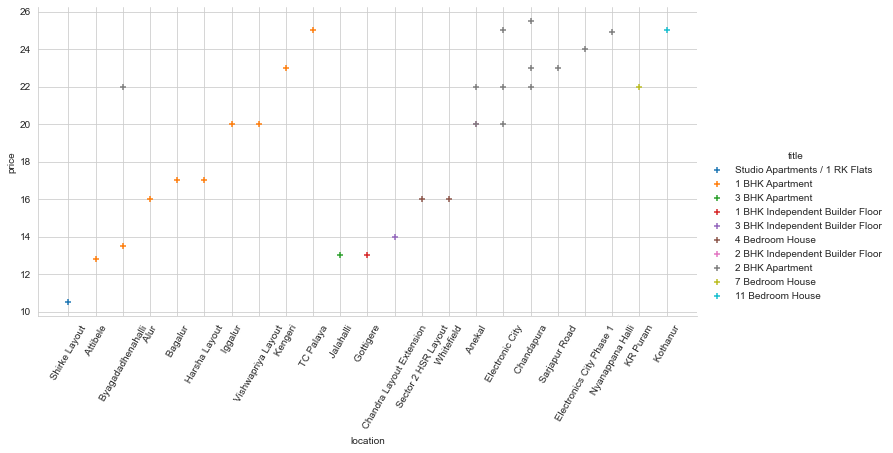

In [46]:
multi_scatter('location','price','title',10.5,100)

Graph 1:
For the price range of 10.5L to 100L from high to low price for top 30

Mostly highest price of 1 Cr is there in all loacations

From Electronic city phase 1 to Thanisandra there are more no. of 3BHK Apartment

Graph 2:
For the price range of 10.5L to 100L from high to low price for bottom 30

Moslty,lowest price of 26L is there for 2BHK Apartment in Chandrapura, TC Palaya.

In [47]:
def multi_pair(x,y,d):
    c=house[(house['price']>=x)&(house['price']<=y)]
    sns.pairplot(d6_sort,kind='reg')

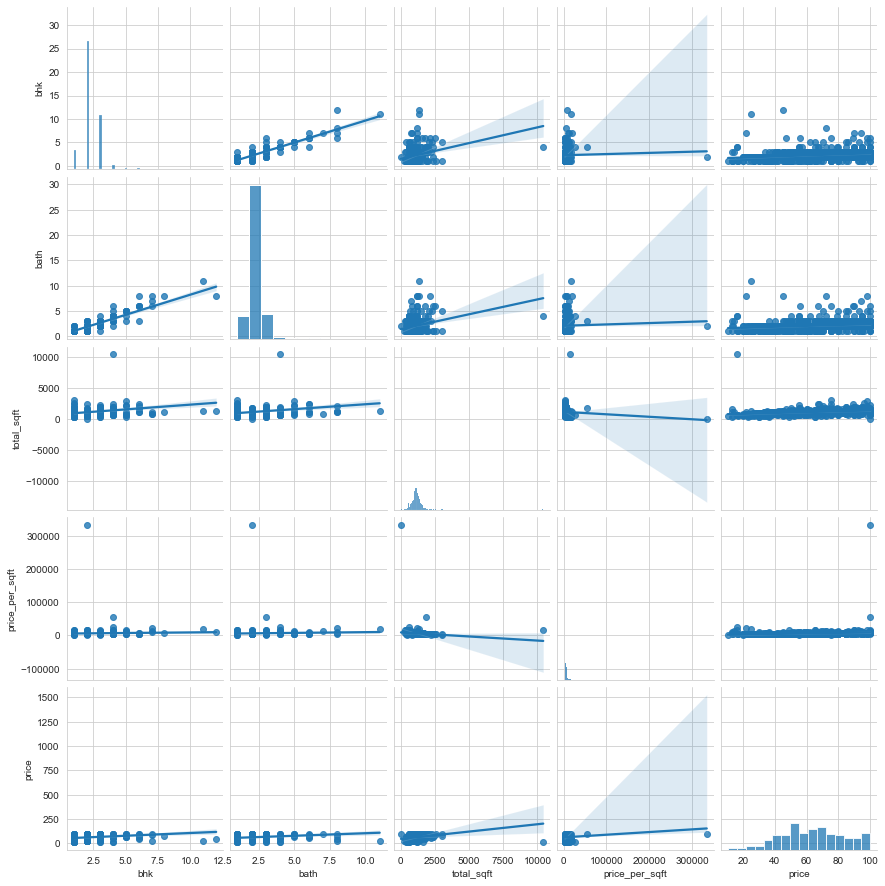

In [48]:
multi_pair(10.5,100,c)

For the price range of 10.5 to 100 L,the relationship between each and every variable is plotted where the plots below the diagonal are having mirror plots above the diagonal.

There are positive and negative slopes above and below of the diagonal.

# Interval (100L-900L)

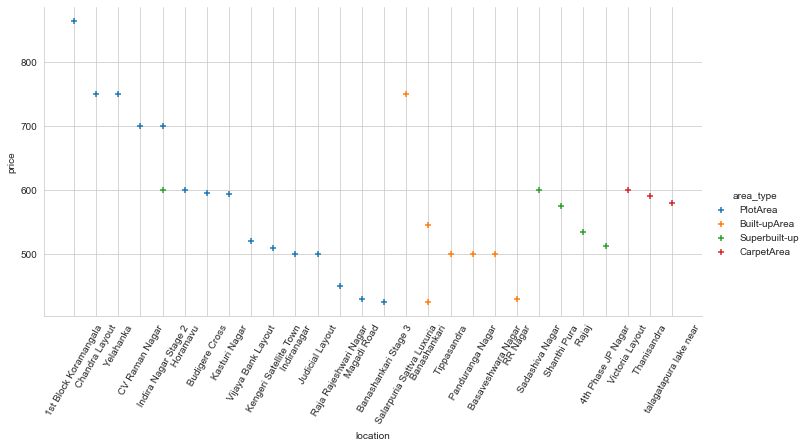

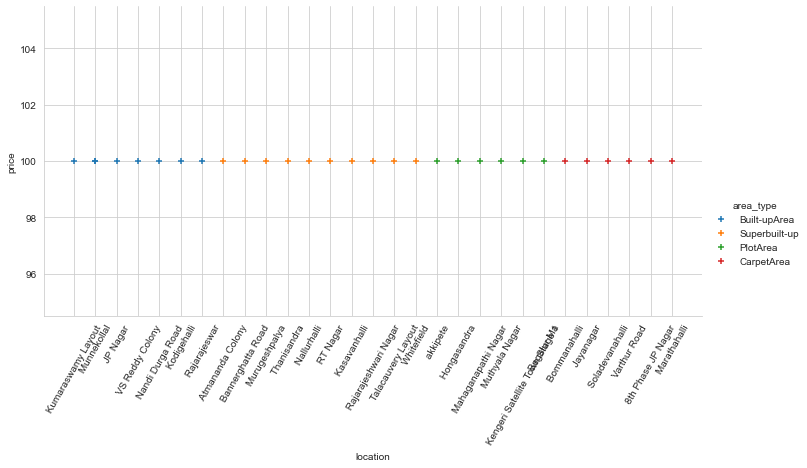

In [49]:
multi_scatter('location','price','area_type',100,900)

Graph 1:
For the price range of 100L to 900L from high to low price for top 30

Most ofproperties are of Plot Area type from 1st block koramangala to Magadi road.

Graph 2:
For the price range of 100L to 900L from high to low price for bottom 30

Moslty,lowest price of 100L is there for Superbuilt-up area from Rajarajeshwar to Whitefield.

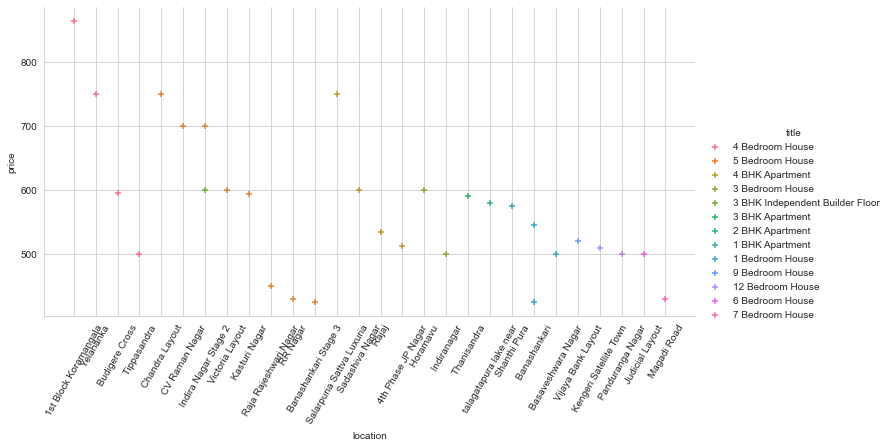

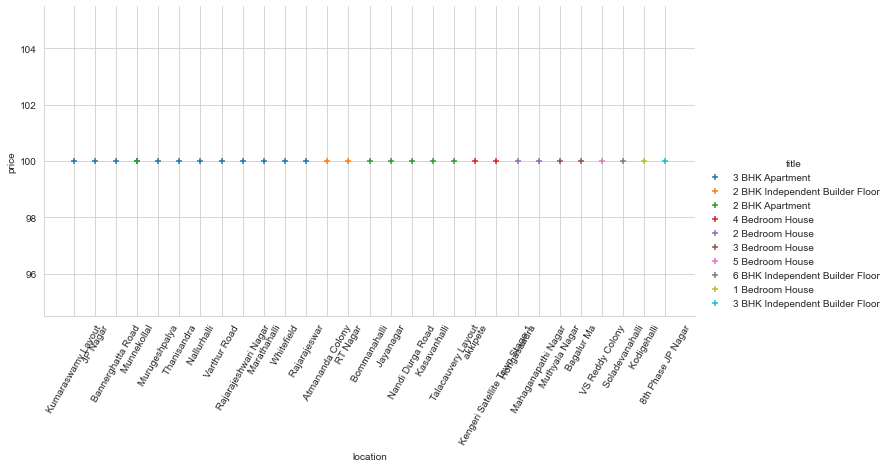

In [50]:
multi_scatter('location','price','title',100,900)

Graph 1:
For the price range of 100 to 900L from high to low price for top 30

Mostly, highest price of 890L in 1st block koramangala

Graph 2:
For the price range of 100 to 900L from high to low price for bottom 30

Moslty,lowest price of 100L and there are more 3BHK Apartment from Kumaraswamy Layout to Whitefield.

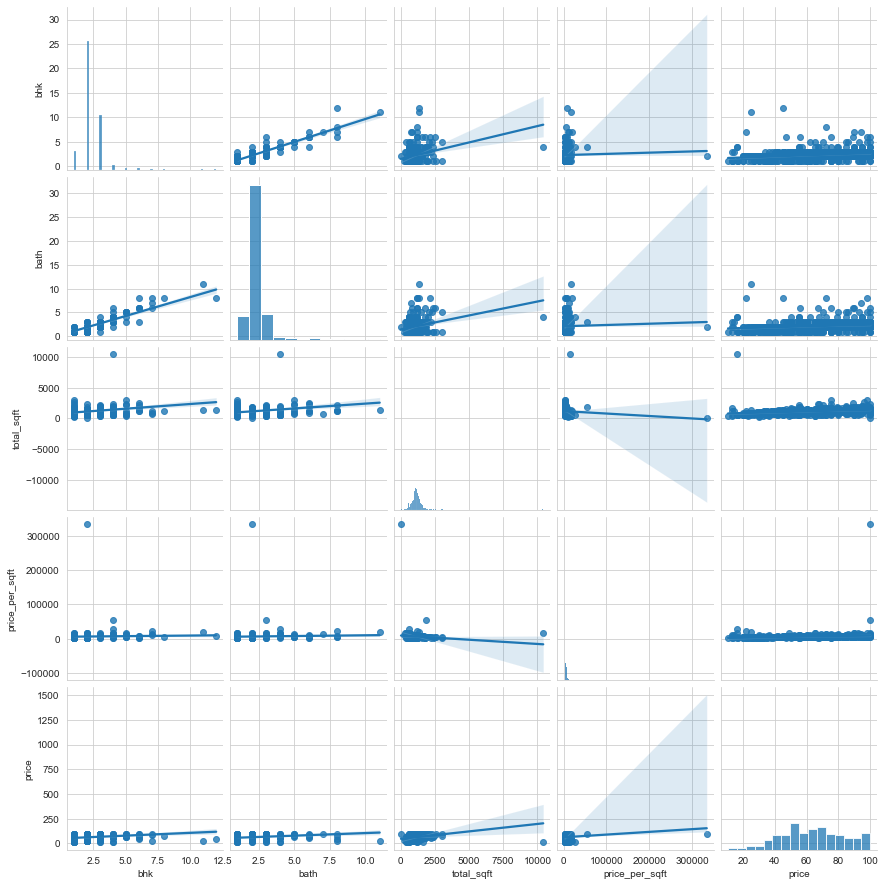

In [51]:
c=house[(house['price']>=100)&(house['price']<=900)]
multi_pair(100,900,c)

For the price range of 100 to 900L,the relationship between each and every variable is plotted where the plots below the diagonal are having mirror plots above the diagonal.

There are positive and negative slopes above and below of the diagonal.